# Projektaufgabe: Diskriptive Statistik und Visualisierung

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

df = pd.read_csv('../data/Library_Usage.csv')

#### Wie viele NutzerInnen möchten per E-Mail benachrichtigt werden? Welche Altersgruppe ist bei der E-Mail Benachrichtugung am häufigsten vertreten?

In [3]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Within San Francisco County'],
      dtype='object')

In [11]:
email = df.loc[
    (df['Notice Preference Definition'] == 'Email')]
email

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437109,3,Senior,3,0,65 to 74 years,a5,Anza,August,2004.0,z,Email,True,2003,True
437110,0,Adult,14,11,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,False
437111,0,Adult,2,0,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,True
437113,3,Senior,4,0,65 to 74 years,m6,Mission,August,2004.0,z,Email,True,2004,True


In [12]:
email['Age Range'].value_counts()

25 to 34 years       88098
35 to 44 years       76322
10 to 19 years       55109
45 to 54 years       45360
0 to 9 years         29979
65 to 74 years       26988
20 to 24 years       21740
55 to 59 years       17403
60 to 64 years       15438
75 years and over    14340
Name: Age Range, dtype: int64

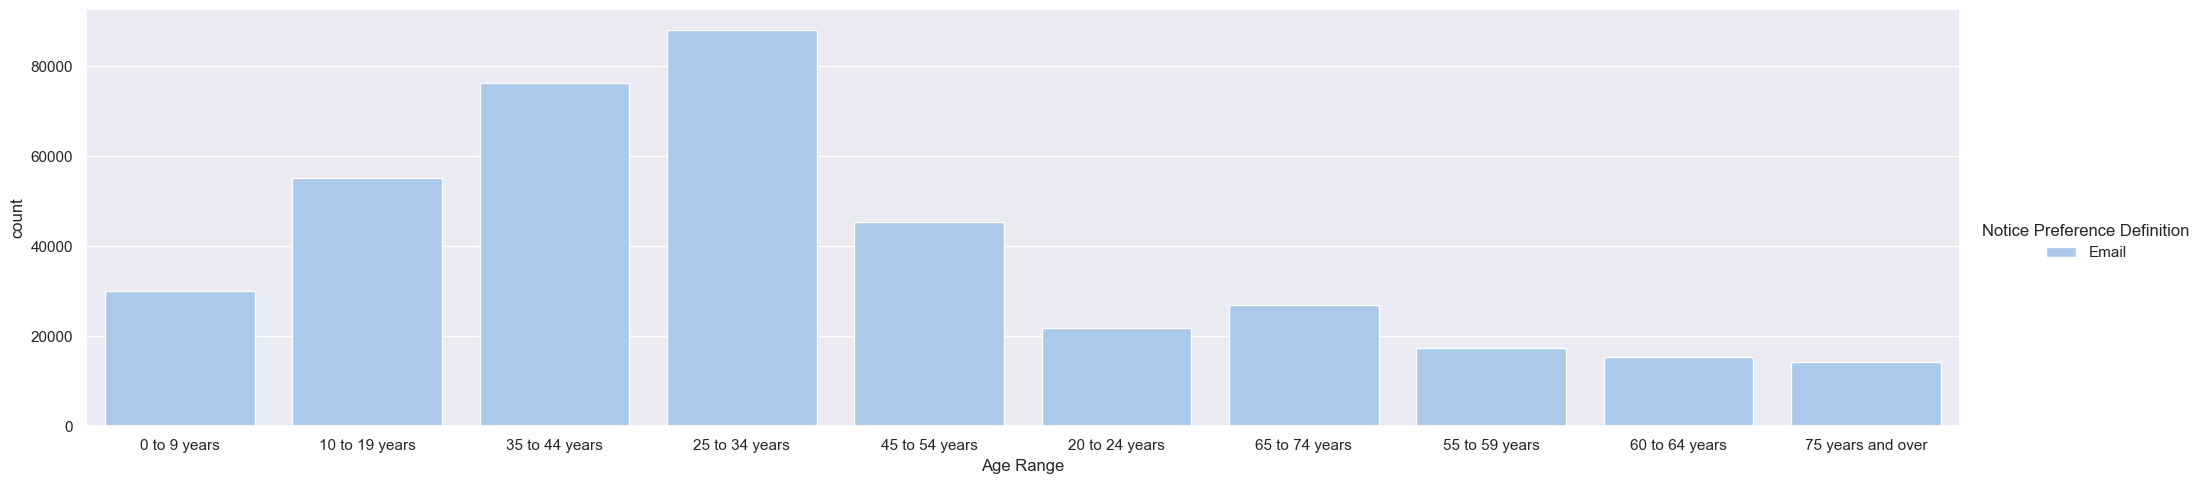

In [29]:
sns.catplot(x='Age Range', kind='count', hue='Notice Preference Definition',
data = email, aspect=4, palette='pastel')

391.614 NutzerInnen möchten per E-Mail benachrichtigt werden. Die am meisten vertretene Altersgruppe sind die 25 bis 34 jährigen mit insgesamt 88.098 NutzerInnen.

#### Welche Altersgruppe tätigt die meisten Ausleihen?

In [31]:
ausleihen = df.loc[
    (df['Total Checkouts'])]

In [32]:
ausleihen['Age Range'].value_counts()

0 to 9 years         157711
10 to 19 years       146437
35 to 44 years        41649
25 to 34 years        37324
45 to 54 years        19266
20 to 24 years        10831
65 to 74 years        10752
55 to 59 years         6273
60 to 64 years         3702
75 years and over      2310
Name: Age Range, dtype: int64

#### Welche Altersgruppe hat monatliche am häufigsten 0 Ausleihen?